In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(r"E:\DS Projects\Black Friday Sales EDA\BFS.csv")

In [3]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [4]:
df.shape

(550068, 12)

In [5]:
df.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase'],
      dtype='object')

In [6]:
df.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64

<AxesSubplot:>

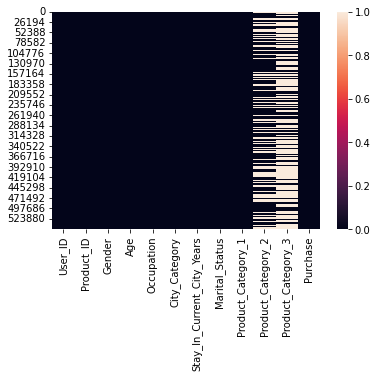

In [7]:
sns.heatmap(df.isnull())

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [9]:
df.Product_ID.value_counts()

P00265242    1880
P00025442    1615
P00110742    1612
P00112142    1562
P00057642    1470
             ... 
P00314842       1
P00298842       1
P00231642       1
P00204442       1
P00066342       1
Name: Product_ID, Length: 3631, dtype: int64

In [10]:
df.Age.value_counts()

26-35    219587
36-45    110013
18-25     99660
46-50     45701
51-55     38501
55+       21504
0-17      15102
Name: Age, dtype: int64

In [11]:
df.Occupation.value_counts()

4     72308
0     69638
7     59133
1     47426
17    40043
20    33562
12    31179
14    27309
2     26588
16    25371
6     20355
3     17650
10    12930
5     12177
15    12165
11    11586
19     8461
13     7728
18     6622
9      6291
8      1546
Name: Occupation, dtype: int64

In [12]:
df.duplicated().sum()

0

In [13]:
df.rename(columns={
    'User_ID' : 'Userid', 
    'Product_ID' : 'Productid', 
    'Stay_In_Current_City_Years' : 'City',
    'Marital_Status' : 'Marital', 
    'Product_Category_1' : 'Product1',
    'Product_Category_2' : 'Product2', 
    'Product_Category_3' : 'Product3'
}, inplace = True)
df

,Userid,Productid,Gender,Age,Occupation,City_Category,City,Marital,Product1,Product2,Product3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969
...,...,...,...,...,...,...,...,...,...,...,...,...
550063,1006033,P00372445,M,51-55,13,B,1,1,20,NaN,NaN,368
550064,1006035,P00375436,F,26-35,1,C,3,0,20,NaN,NaN,371
550065,1006036,P00375436,F,26-35,15,B,4+,1,20,NaN,NaN,137
550066,1006038,P00375436,F,55+,1,C,2,0,20,NaN,NaN,365


In [14]:
df.drop(['Productid'], axis=1, inplace = True)
df

,Userid,Gender,Age,Occupation,City_Category,City,Marital,Product1,Product2,Product3,Purchase
0,1000001,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,M,55+,16,C,4+,0,8,NaN,NaN,7969
...,...,...,...,...,...,...,...,...,...,...,...
550063,1006033,M,51-55,13,B,1,1,20,NaN,NaN,368
550064,1006035,F,26-35,1,C,3,0,20,NaN,NaN,371
550065,1006036,F,26-35,15,B,4+,1,20,NaN,NaN,137
550066,1006038,F,55+,1,C,2,0,20,NaN,NaN,365


In [15]:
df.City.unique()

array(['2', '4+', '3', '1', '0'], dtype=object)

In [16]:
def cities(value):
    if '+' in value:
        value = value.replace('+','')
        return int(value)
    else:
        return int(value)
    
df.City = df.City.apply(cities)
df

,Userid,Gender,Age,Occupation,City_Category,City,Marital,Product1,Product2,Product3,Purchase
0,1000001,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,M,55+,16,C,4,0,8,NaN,NaN,7969
...,...,...,...,...,...,...,...,...,...,...,...
550063,1006033,M,51-55,13,B,1,1,20,NaN,NaN,368
550064,1006035,F,26-35,1,C,3,0,20,NaN,NaN,371
550065,1006036,F,26-35,15,B,4,1,20,NaN,NaN,137
550066,1006038,F,55+,1,C,2,0,20,NaN,NaN,365


In [17]:
df.Age.unique()

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

In [18]:
def age(value):
    if '0-17' in value:
        value = value.replace('0-17','child')
        return str(value)
    if '18-25' in value:
        value = value.replace('18-25','teenage')
        return str(value)
    if '26-35' in value:
        value = value.replace('26-35','adult')
        return str(value)
    if '36-45' in value:
        value = value.replace('36-45','adult')
        return str(value)
    if '46-50' in value:
        value = value.replace('46-50','child')
        return str(value)
    if '51-55' in value:
        value = value.replace('51-55','old')
        return str(value)
    if '55+' in value:
        value = value.replace('55+','old')
        return str(value)
    
df.Age = df.Age.apply(age)
df

,Userid,Gender,Age,Occupation,City_Category,City,Marital,Product1,Product2,Product3,Purchase
0,1000001,F,child,10,A,2,0,3,NaN,NaN,8370
1,1000001,F,child,10,A,2,0,1,6.0,14.0,15200
2,1000001,F,child,10,A,2,0,12,NaN,NaN,1422
3,1000001,F,child,10,A,2,0,12,14.0,NaN,1057
4,1000002,M,old,16,C,4,0,8,NaN,NaN,7969
...,...,...,...,...,...,...,...,...,...,...,...
550063,1006033,M,old,13,B,1,1,20,NaN,NaN,368
550064,1006035,F,adult,1,C,3,0,20,NaN,NaN,371
550065,1006036,F,adult,15,B,4,1,20,NaN,NaN,137
550066,1006038,F,old,1,C,2,0,20,NaN,NaN,365


In [19]:
df['Age'].unique()

array(['child', 'old', 'adult', 'teenage'], dtype=object)

In [20]:
df['Product2'].isnull().sum()

173638

In [21]:
(df['Product2'].isnull().sum() / len(df)) * 100
s=df.groupby('Age')['Product2'].agg(pd.Series.mode)
s

Age
adult      8.0
child      8.0
old        8.0
teenage    8.0
Name: Product2, dtype: float64

In [22]:
for key in s.index:
    df.loc[(df['Age']==key) & (df['Product2'].isnull()), 'Product2'] = s[key]

df['Product2'].isnull().sum()

0

In [23]:
df['Product3'].isnull().sum()

383247

In [24]:
(df['Product3'].isnull().sum() / len(df)) * 100
t = df.groupby('Age')['Product3'].agg(pd.Series.mode)
t

Age
adult      16.0
child      16.0
old        16.0
teenage    16.0
Name: Product3, dtype: float64

In [25]:
for key in t.index:
    df.loc[(df['Age']==key) & (df['Product3'].isnull()), 'Product3'] = s[key]

df['Product3'].isnull().sum()

0

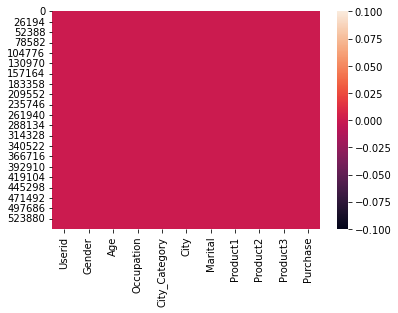

In [27]:
sns.heatmap(df.isnull())
plt.show()

<AxesSubplot:title={'center':'Age vs Purchase'}, xlabel='Age', ylabel='Purchase'>

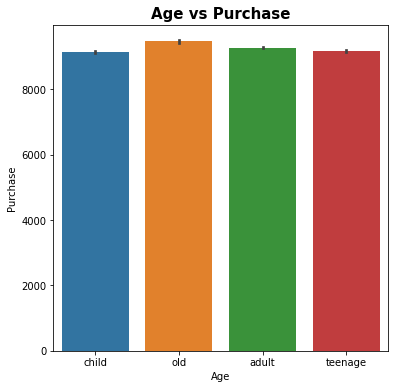

In [33]:
plt.figure(figsize = (6, 6))
plt.title('Age vs Purchase', fontsize = 15, fontweight = 'bold')
sns.barplot(x = "Age", y = "Purchase", data = df)

C:\Users\HP\AppData\Roaming\Python\Python310\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\HP\AppData\Roaming\Python\Python310\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\HP\AppData\Roaming\Python\Python310\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


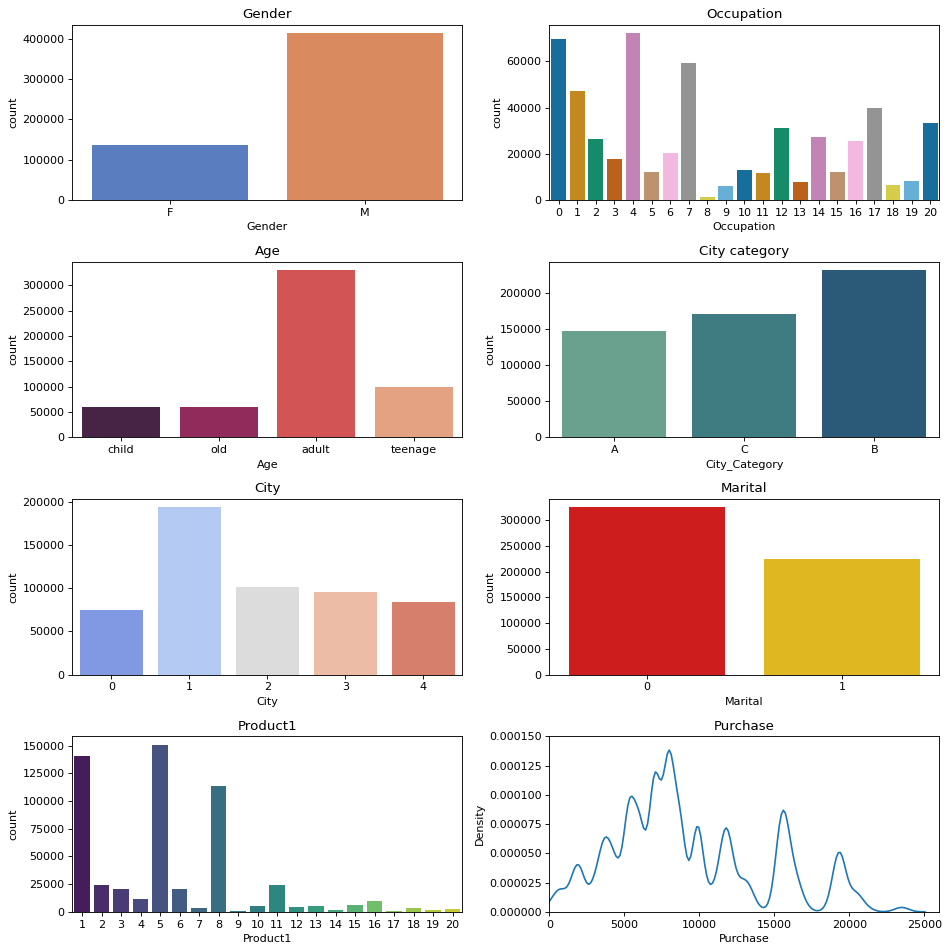

In [37]:
plt.figure(figsize = (12, 12), dpi = 80)

plt.subplot(4, 2, 1)
plt.title('Gender')
sns.countplot(df['Gender'], palette = 'muted')

plt.subplot(4, 2, 2)
plt.title('Occupation')
sns.countplot(df['Occupation'], palette = 'colorblind')

plt.subplot(4, 2, 3)
plt.title('Age')
sns.countplot(df['Age'], palette = 'rocket')

plt.subplot(4, 2, 4)
plt.title('City category')
sns.countplot(df['City_Category'], palette = 'crest')

plt.subplot(4, 2, 5)
plt.title('City')
sns.countplot(df['City'], palette = 'coolwarm')

plt.subplot(4, 2, 6)
plt.title('Marital')
sns.countplot(df['Marital'], palette = 'hot')

plt.subplot(4, 2, 7)
plt.title('Product1')
sns.countplot(df['Product1'], palette = 'viridis')


ax = plt.subplot(4, 2, 8)
plt.title('Purchase')
ax.set_ylim(0, 0.00015)
ax.set_xlim(0, 26000)
sns.kdeplot(df['Purchase'])

plt.tight_layout()
plt.show()

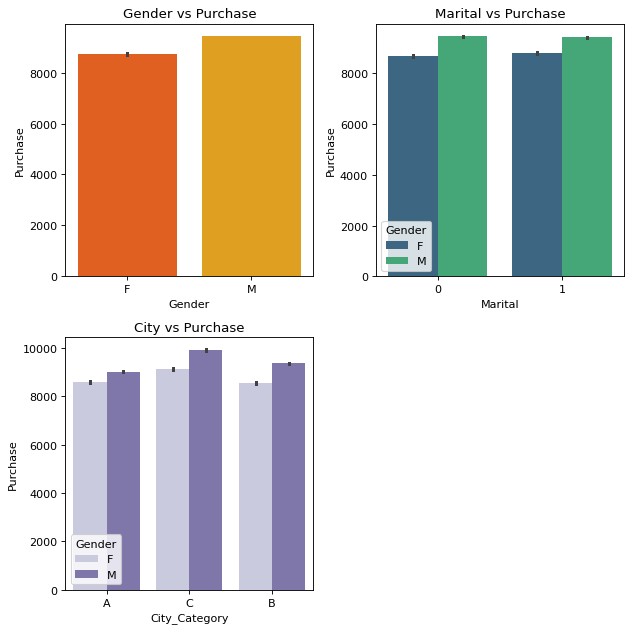

In [38]:
plt.figure(figsize = (8, 8), dpi = 80)

plt.subplot(2, 2, 1)
plt.title('Gender vs Purchase')
sns.barplot(x = 'Gender', y = 'Purchase', data = df, palette = 'autumn')

plt.subplot(2, 2, 2)
plt.title('Marital vs Purchase')
sns.barplot(x = 'Marital', y = 'Purchase', hue = 'Gender', data = df, palette = 'viridis')

plt.subplot(2, 2, 3)
plt.title('City vs Purchase')
sns.barplot(x = 'City_Category', y = 'Purchase', hue = 'Gender', data = df, palette = 'Purples')

plt.tight_layout()
plt.show()

<AxesSubplot:title={'center':'Marital Status vs Purchase'}, xlabel='Marital', ylabel='Purchase'>

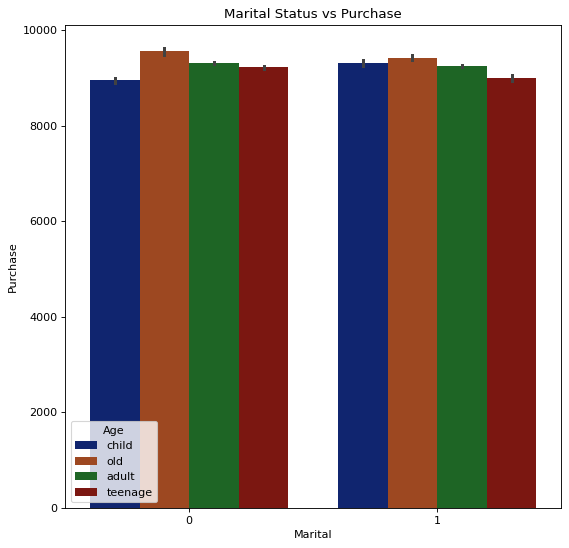

In [44]:
plt.figure(figsize = (8, 8), dpi = 80)
plt.title('Marital Status vs Purchase')
sns.barplot(x = 'Marital', y = 'Purchase', data = df, palette = 'dark', hue = 'Age')

,Age
Age,
adult,329600
child,60803
old,60005
teenage,99660


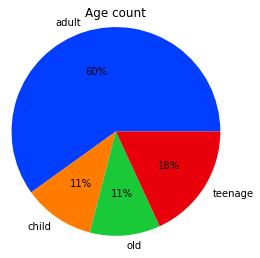

In [47]:
a = df.groupby('Age')['Age'].agg('count')
display(a.to_frame())
plt.title('Age count')
palette_color = sns.color_palette('bright')
plt.pie(a, colors = palette_color, labels = a.index, radius = 1.2, autopct = '%.0f%%')
plt.show()

,City_Category
City_Category,
A,147720
B,231173
C,171175


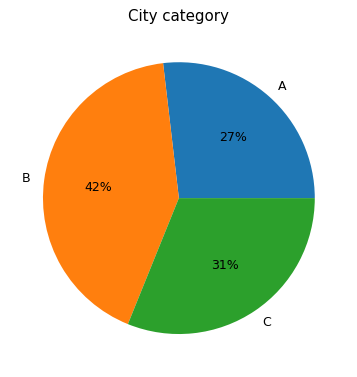

In [48]:
plt.figure(figsize=(5,5),dpi=90)
plt.title('City category')
palette_color=sns.color_palette('bright')
b=df.groupby('City_Category')['City_Category'].agg('count')
display(b.to_frame())
plt.pie(b,labels=b.index,autopct='%.0f%%')
plt.show()

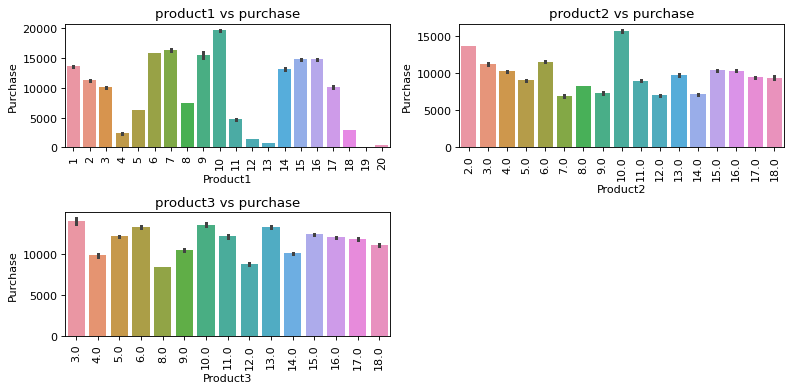

In [49]:
#Plotting products vs purchase rate
plt.figure(figsize=(10,5),dpi=80)
plt.subplot(2,2,1)
plt.title('product1 vs purchase')
sns.barplot(x='Product1',y='Purchase',data=df)
plt.xticks(rotation=90)

plt.subplot(2,2,2)
plt.title('product2 vs purchase')
sns.barplot(x='Product2',y='Purchase',data=df)
plt.xticks(rotation=90)

plt.subplot(2,2,3)
plt.title('product3 vs purchase')
sns.barplot(x='Product3',y='Purchase',data=df)
plt.xticks(rotation=90)


plt.tight_layout()
plt.show()

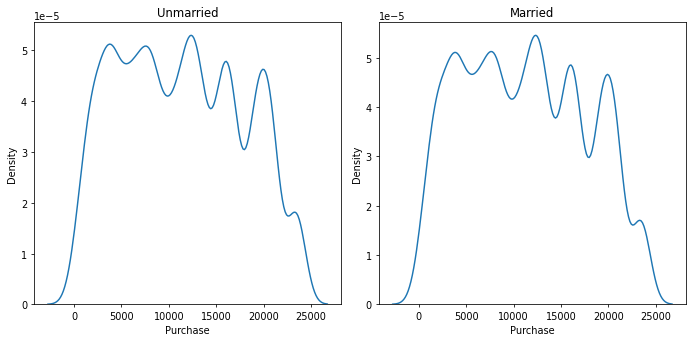

In [50]:
plt.figure(figsize=(10,5),dpi=70)
plt.subplot(1,2,1)
um=df[df['Marital']==0].value_counts('Purchase')
plt.title('Unmarried')
sns.kdeplot('Purchase',data=um)

plt.subplot(1,2,2)
m=df[df['Marital']==1].value_counts('Purchase')
plt.title('Married')
sns.kdeplot('Purchase',data=m)

plt.tight_layout()
plt.show()

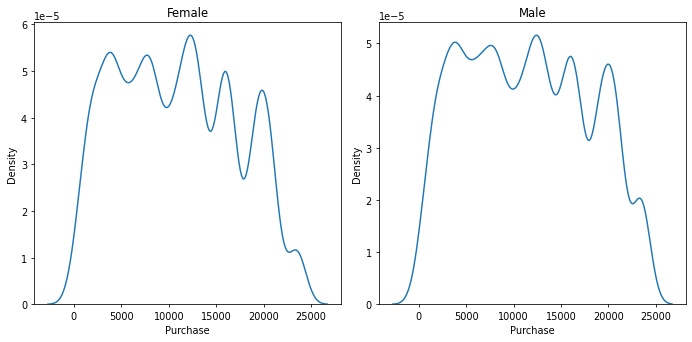

In [51]:
plt.figure(figsize=(10,5),dpi=70)
plt.subplot(1,2,1)
f=df[df['Gender']=='F'].value_counts('Purchase')
plt.title('Female')
sns.kdeplot('Purchase',data=f)

plt.subplot(1,2,2)
ma=df[df['Gender']=='M'].value_counts('Purchase')
plt.title('Male')
sns.kdeplot('Purchase',data=ma)

plt.tight_layout()
plt.show()